# Decision trees

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Changing the look of the plots a bit
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [4]:
#UCI Machine Learning Repository dataset
car_data = pd.read_csv('car_evaluation.csv', header=None)
car_data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


All data is non null which is good and means no steps have to be taken to fix that

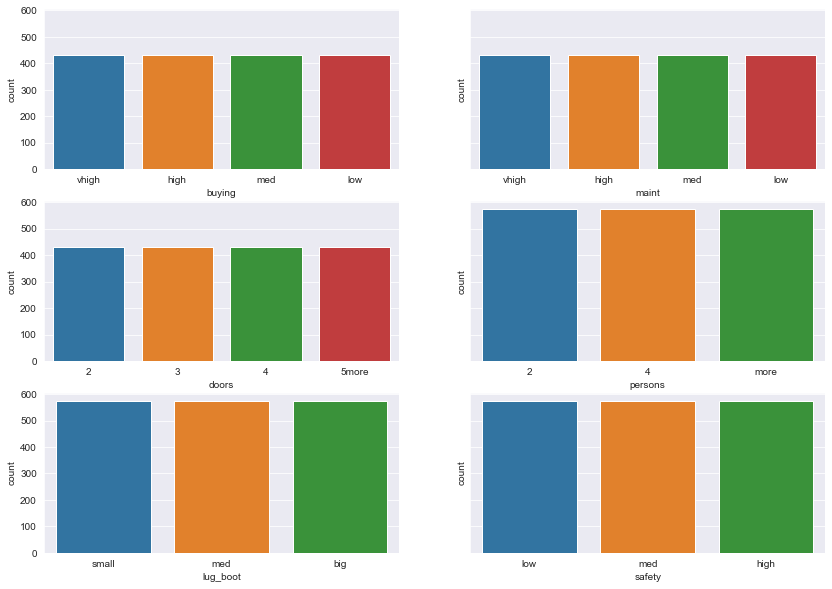

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True, figsize=(14, 10))
sns.countplot(x=car_data['buying'], ax=axes[0][0])
sns.countplot(x=car_data['maint'], ax=axes[0][1])
sns.countplot(x=car_data['doors'], ax=axes[1][0])
sns.countplot(x=car_data['persons'], ax=axes[1][1])
sns.countplot(x=car_data['lug_boot'], ax=axes[2][0])
sns.countplot(x=car_data['safety'], ax=axes[2][1])
plt.show()

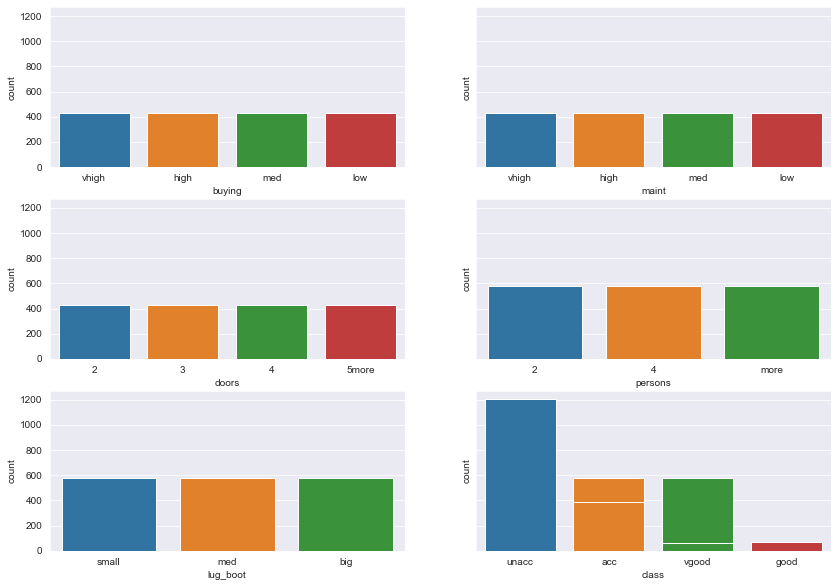

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True, figsize=(14, 10))
sns.countplot(x=car_data['buying'], ax=axes[0][0])
sns.countplot(x=car_data['maint'], ax=axes[0][1])
sns.countplot(x=car_data['doors'], ax=axes[1][0])
sns.countplot(x=car_data['persons'], ax=axes[1][1])
sns.countplot(x=car_data['lug_boot'], ax=axes[2][0])
sns.countplot(x=car_data['safety'], ax=axes[2][1])
sns.countplot(x=car_data['class'])
plt.show()

Most of the data except for class seems to have the same values for each category?

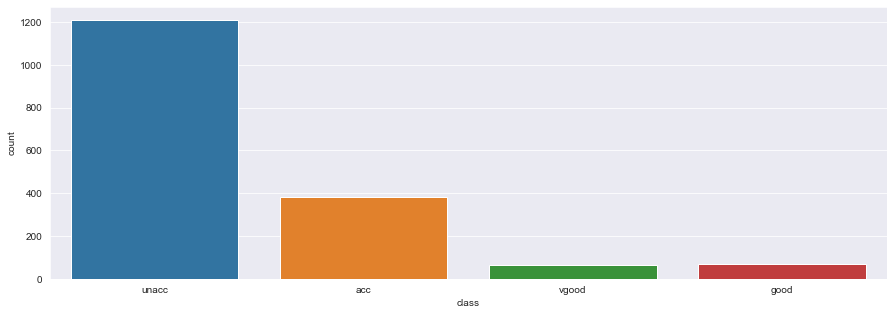

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [12]:
sns.countplot(x=car_data['class'])
plt.show()
car_data['class'].value_counts()

In [14]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Most of the columns consist of categorical data which will need to be converted in order to train our model

In [15]:
buying_mappings = {'low':0, 'med':1, 'high':2, 'vhigh':3}
maint_mappings = {'low':0, 'med':1, 'high':2, 'vhigh':3}
door_mappings = {'2':2, '3':3, '4':4, '5more':5}
persons_mappings = {'2':2, '4':4, 'more':5}
lug_boot_mappings = {'small':0, 'med':1, 'big':2}
safety_mappings = {'low':0, 'med':1, 'high':2}
class_mappings = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}

This allows all of the columns to keep the order of the variable while losing the category in favor of integers

In [16]:
car_data['buying'] = car_data['buying'].map(buying_mappings)
car_data['maint'] = car_data['maint'].map(maint_mappings)
car_data['doors'] = car_data['doors'].map(door_mappings)
car_data['persons'] = car_data['persons'].map(persons_mappings)
car_data['lug_boot'] = car_data['lug_boot'].map(lug_boot_mappings)
car_data['safety'] = car_data['safety'].map(safety_mappings)
car_data['class'] = car_data['class'].map(class_mappings)

In [17]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


    All categorical variables are gone. We used the map function from pandas

In [18]:
from sklearn.model_selection import train_test_split

X = car_data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = car_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

This is the same training testing split that we have been using

In [19]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

However this time we are creating a decision tree model instead of a linear regression

In [21]:
# predict the test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8073


In [23]:
#Let's also compare the train-set and test-set accuracy and check for overfitting.

y_pred_train_gini = clf_gini.predict(X_train)
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7849
Test set score: 0.8073


The values are less than 2% off so this suggest that the model is not overfitted

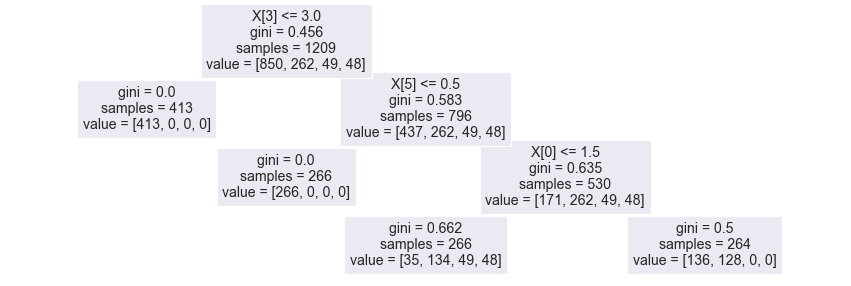

In [24]:
from sklearn import tree
tree.plot_tree(clf_gini) 
plt.show()

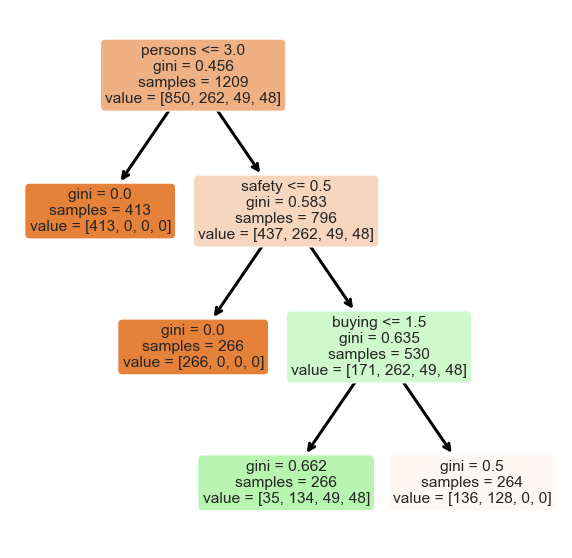

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf_gini, filled=True, rounded=True,
                     feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

In [26]:
# instantiate the DecisionTreeClassifier model with criterion entropy index
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [27]:
# predict the test set results with criterion entropy index
y_pred_entropy = clf_entropy.predict(X_test)

print('Model accuracy score with criterion entropy index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion entropy index: 0.8073


In [28]:
#Let's also compare the train-set and test-set accuracy and check for overfitting.

y_pred_train_entropy = clf_entropy.predict(X_train)
print('Training set score: {:.4f}'.format(clf_entropy.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_entropy.score(X_test, y_test)))

Training set score: 0.7849
Test set score: 0.8073


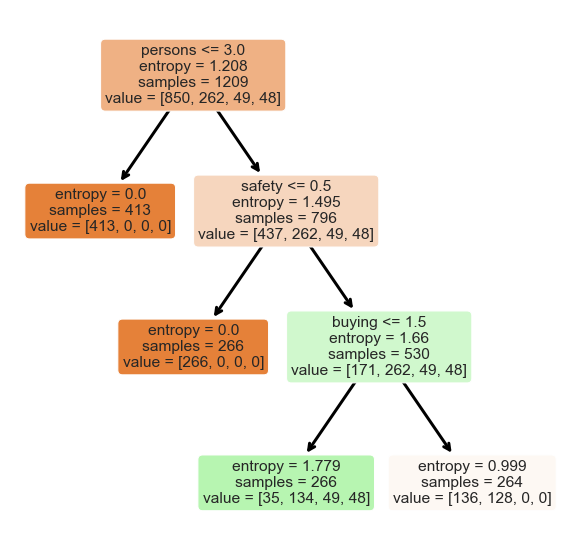

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf_entropy, filled=True, rounded=True,
                     feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

My results with the entropy criterion seem to be identical to gini

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
rfc_pred = rfc.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, rfc_pred)))

Model accuracy score: 0.9711


The random forest method is better than gini or entropy because it uses a number of decision trees to come 
    to a consensus on the categorization meaning that it controls for correlational data and prevents overfitting